# Wine Quality Dataset - Exploratory Data Analysis

This notebook performs exploratory data analysis on the Portuguese "Vinho Verde" wine dataset to understand:
- Data distribution and summary statistics
- Quality score distribution
- Feature distributions
- Correlations between features and quality
- Differences between red and white wines

In [2]:
import sys
sys.path.insert(0, '../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_loader import load_wine_data, check_missing_values

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Load and Combine Wine Datasets

In [3]:
# Load red and white wine datasets
df = load_wine_data(
    '../wine+quality dataset/winequality-red.csv',
    '../wine+quality dataset/winequality-white.csv'
)

print(f"Total samples: {len(df)}")
print(f"Red wines: {(df['wine_type'] == 0).sum()}")
print(f"White wines: {(df['wine_type'] == 1).sum()}")
print(f"\nDataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

Total samples: 6497
Red wines: 1599
White wines: 4898

Dataset shape: (6497, 13)

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'wine_type']


In [4]:
# Check for missing values
missing = check_missing_values(df)
print("Missing values per column:")
for col, count in missing.items():
    if count > 0:
        print(f"  {col}: {count}")
        
if sum(missing.values()) == 0:
    print("✓ No missing values found!")

Missing values per column:
✓ No missing values found!


In [5]:
# Display first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## 2. Summary Statistics for All Features

In [6]:
# Generate summary statistics
summary_stats = df.describe()
print("Summary Statistics for All Features:")
summary_stats

Summary Statistics for All Features:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [7]:
# Additional statistics
print("\nData Types:")
print(df.dtypes)
print("\nQuality Score Range:")
print(f"Min: {df['quality'].min()}, Max: {df['quality'].max()}")


Data Types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                 int64
dtype: object

Quality Score Range:
Min: 3, Max: 9


## 3. Quality Score Distribution

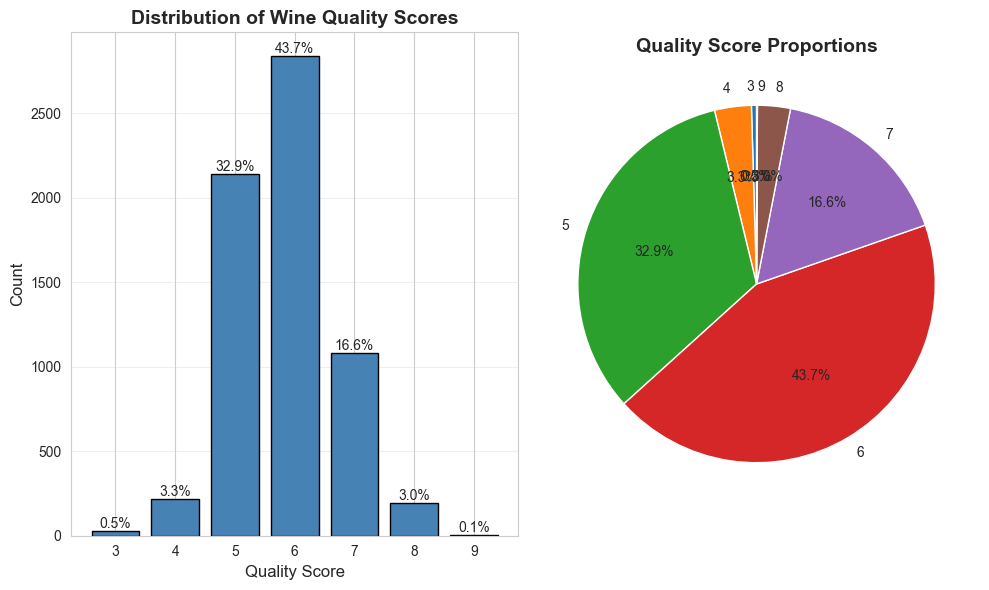


Quality Score Distribution:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

Most common quality score: 6 (2836 samples)


In [8]:
# Plot quality score distribution
plt.figure(figsize=(10, 6))
quality_counts = df['quality'].value_counts().sort_index()

plt.subplot(1, 2, 1)
plt.bar(quality_counts.index, quality_counts.values, color='steelblue', edgecolor='black')
plt.xlabel('Quality Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Wine Quality Scores', fontsize=14, fontweight='bold')
plt.xticks(range(3, 10))
plt.grid(axis='y', alpha=0.3)

# Add percentage labels
for score, count in quality_counts.items():
    percentage = (count / len(df)) * 100
    plt.text(score, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.pie(quality_counts.values, labels=quality_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Quality Score Proportions', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nQuality Score Distribution:")
print(quality_counts)
print(f"\nMost common quality score: {quality_counts.idxmax()} ({quality_counts.max()} samples)")

## 4. Distribution of Physicochemical Features

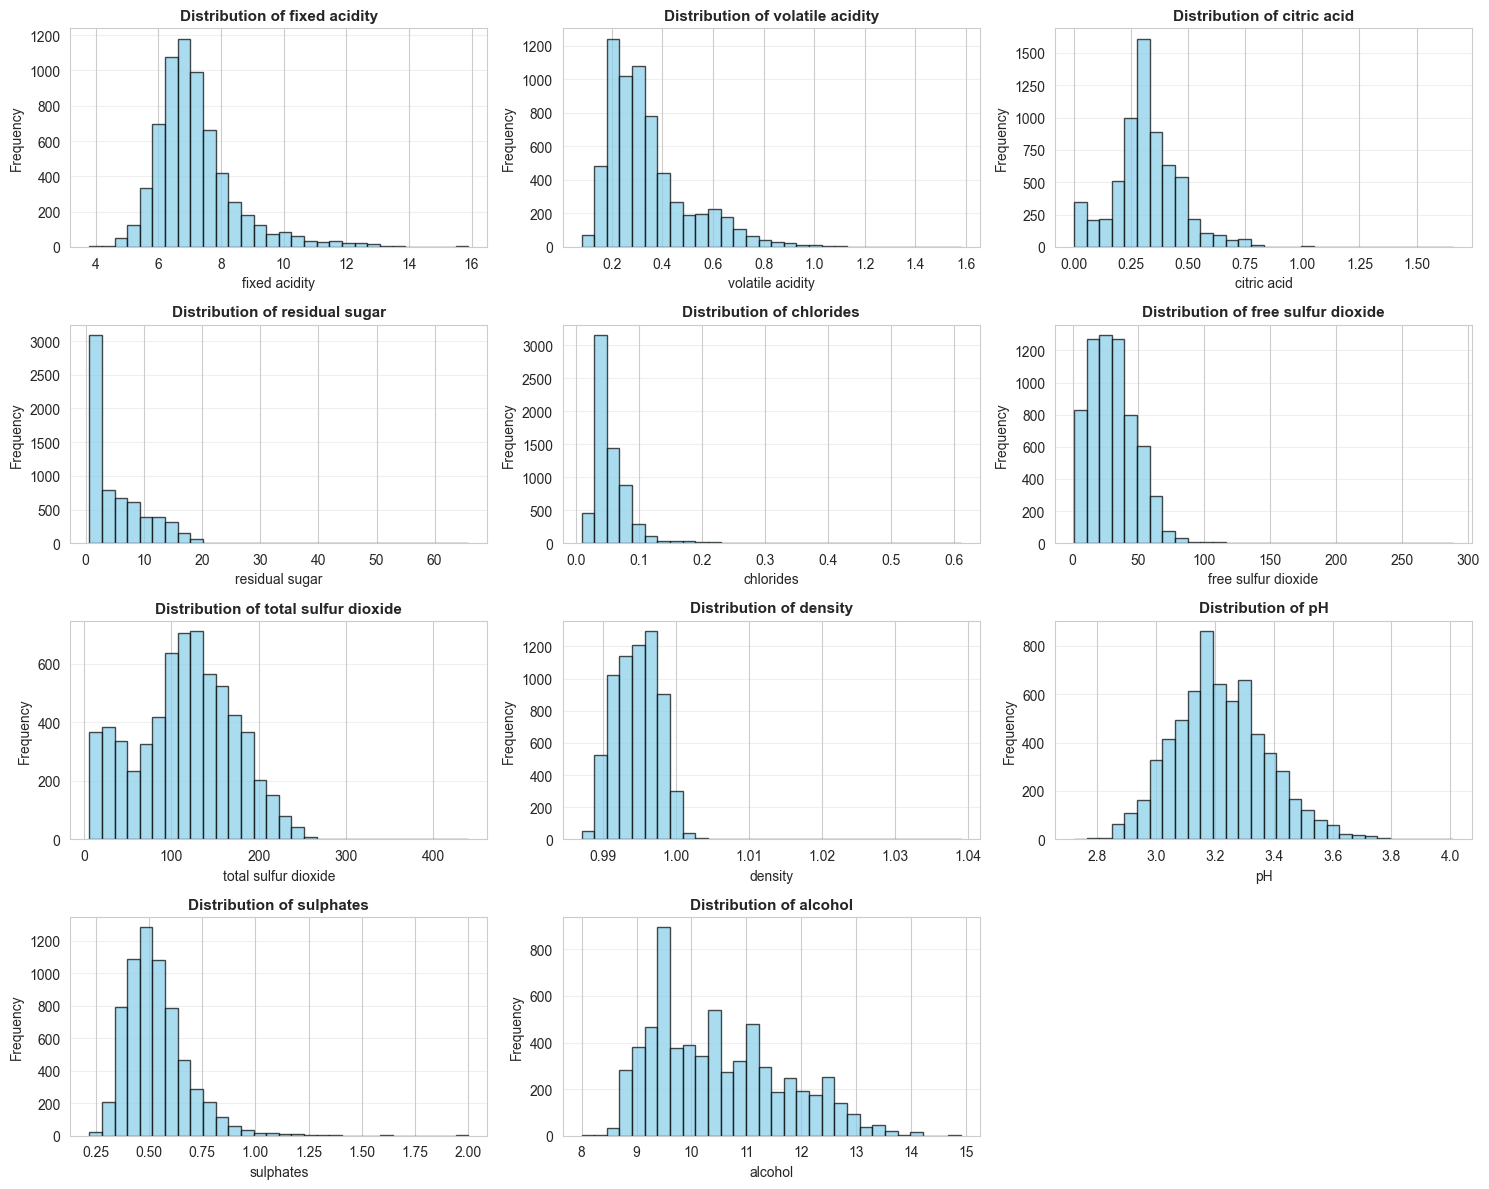

In [9]:
# Get all physicochemical features (exclude quality and wine_type)
feature_cols = [col for col in df.columns if col not in ['quality', 'wine_type']]

# Create histograms for all 11 physicochemical features
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(feature_cols):
    axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

# Hide the last empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

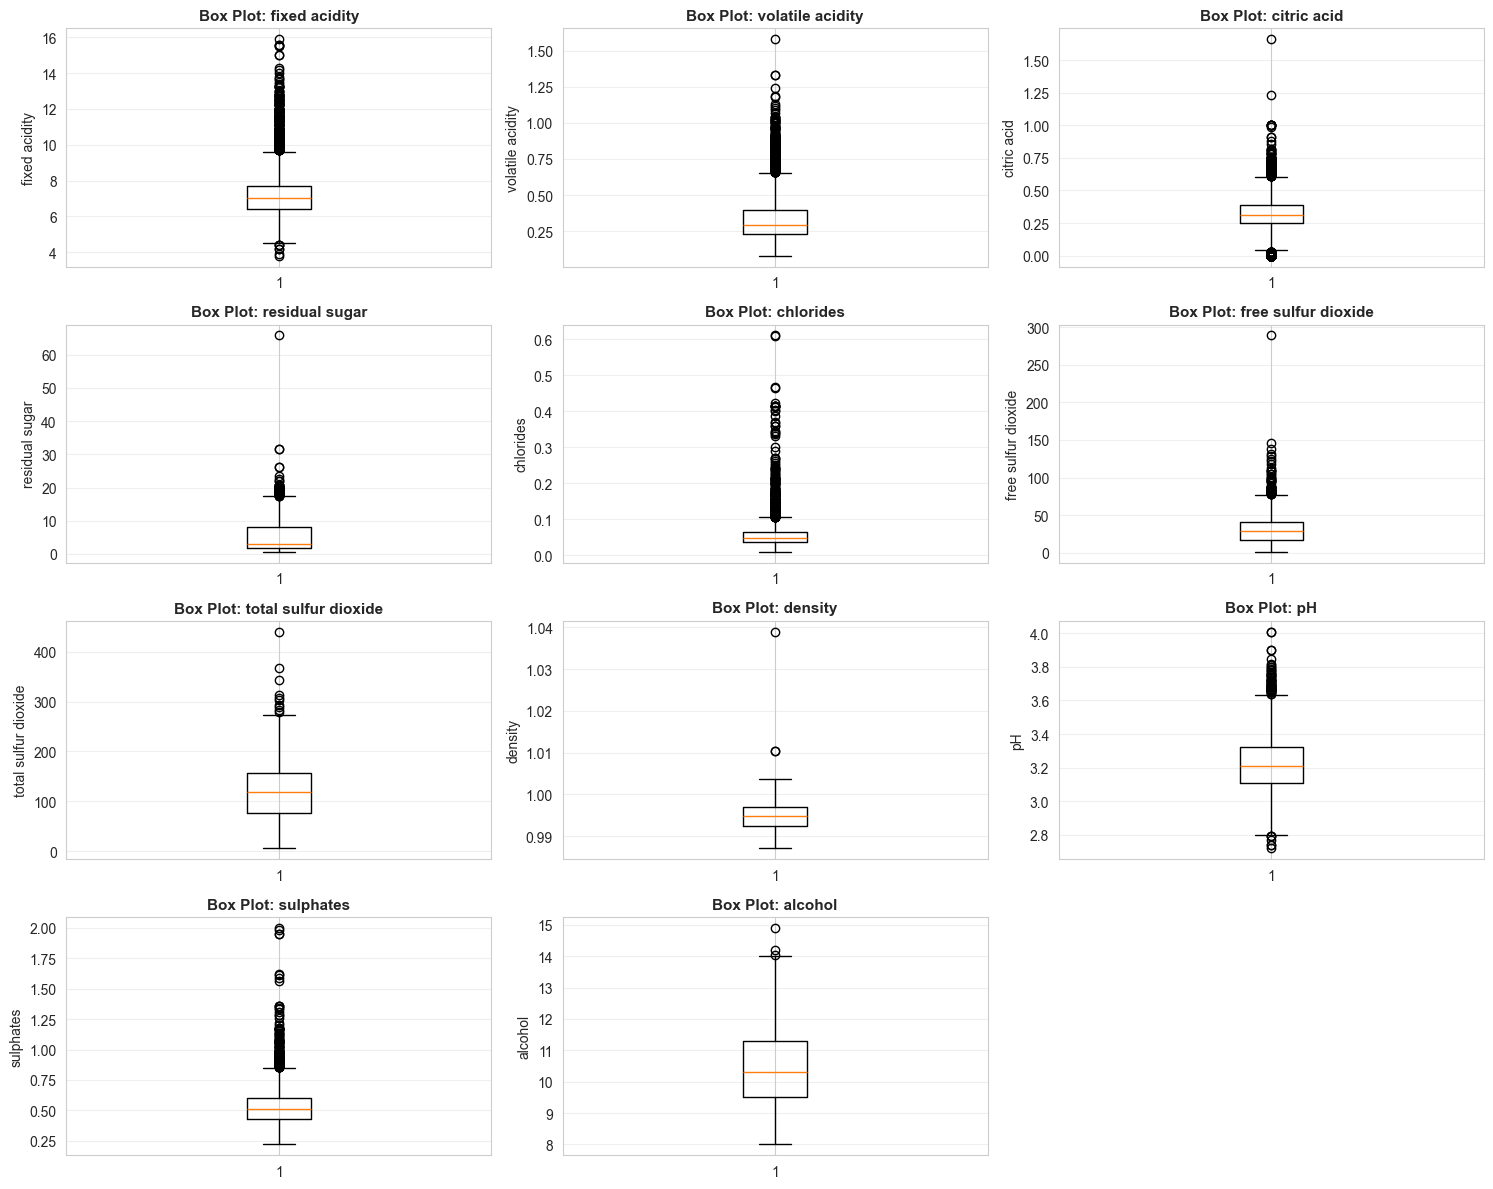

In [10]:
# Box plots to identify outliers
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(feature_cols):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].set_title(f'Box Plot: {col}', fontsize=11, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

axes[-1].axis('off')

plt.tight_layout()
plt.show()

## 5. Correlation Analysis

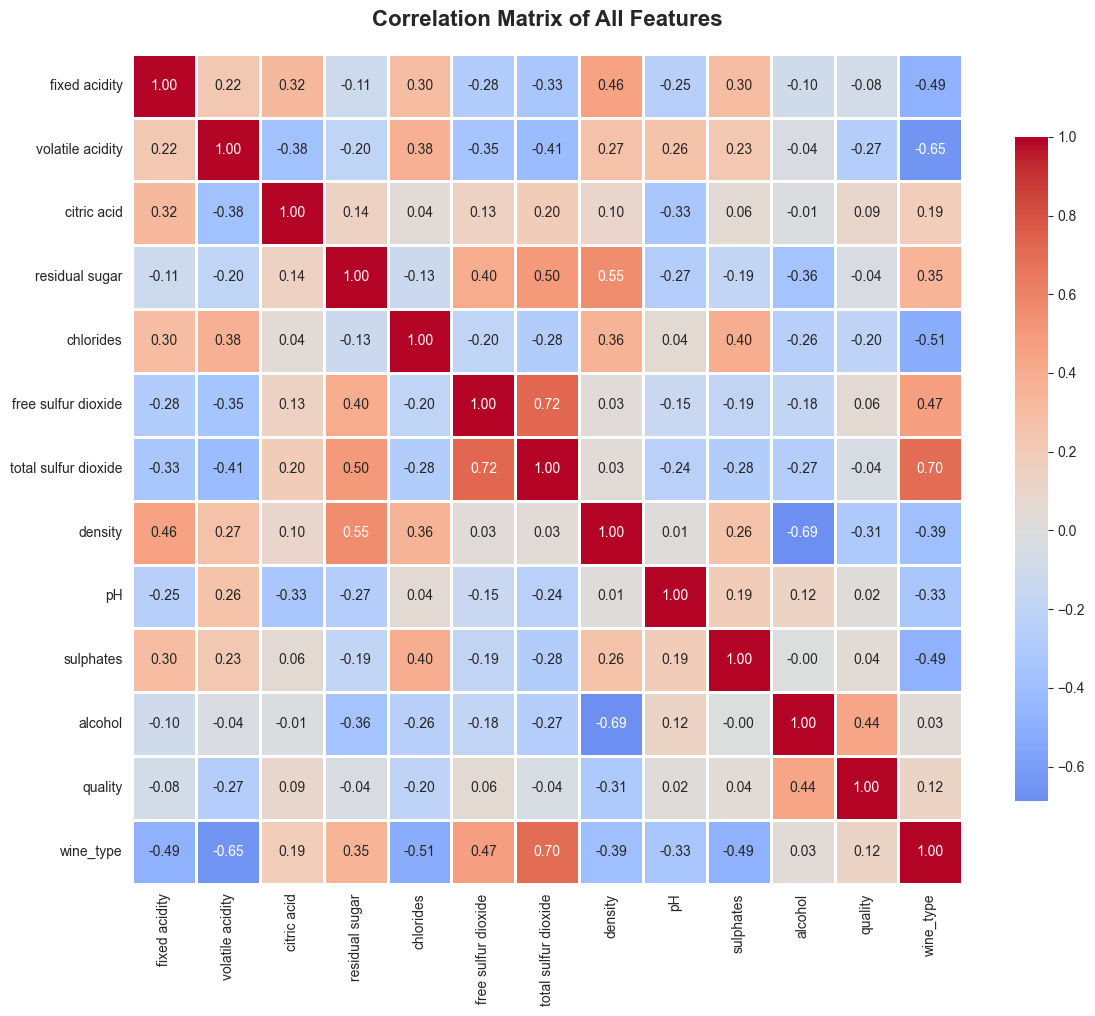

In [11]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize full correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of All Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Correlation of Features with Quality Score:
quality                 1.000000
alcohol                 0.444319
wine_type               0.119323
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


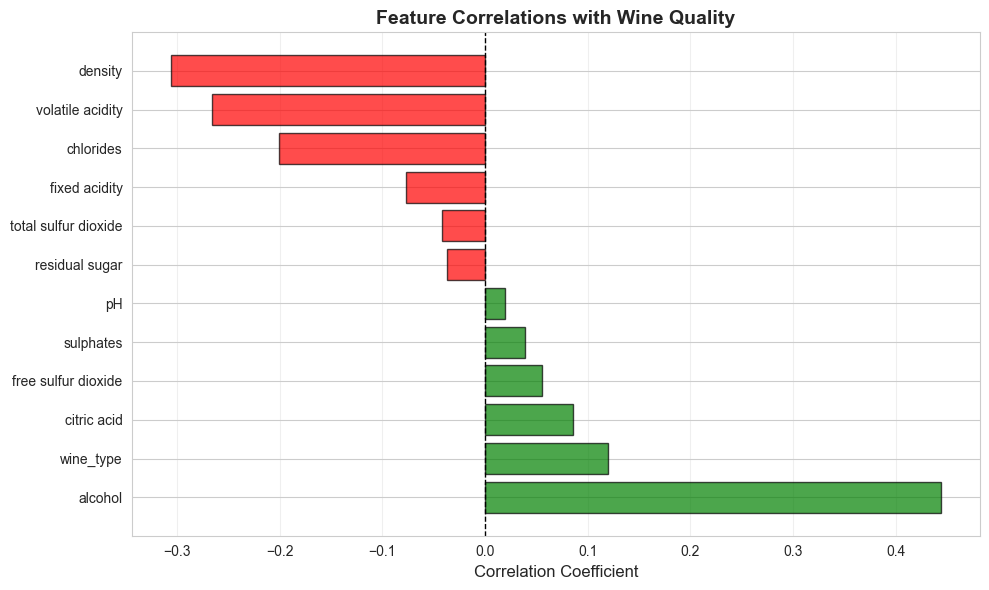


Top 5 Positive Correlations with Quality:
alcohol                0.444319
wine_type              0.119323
citric acid            0.085532
free sulfur dioxide    0.055463
sulphates              0.038485
Name: quality, dtype: float64

Top 5 Negative Correlations with Quality:
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [12]:
# Focus on correlations with quality
quality_correlations = correlation_matrix['quality'].sort_values(ascending=False)
print("Correlation of Features with Quality Score:")
print(quality_correlations)

# Visualize correlations with quality
plt.figure(figsize=(10, 6))
quality_corr_plot = quality_correlations.drop('quality')  # Remove self-correlation
colors = ['green' if x > 0 else 'red' for x in quality_corr_plot.values]
plt.barh(range(len(quality_corr_plot)), quality_corr_plot.values, color=colors, alpha=0.7, edgecolor='black')
plt.yticks(range(len(quality_corr_plot)), quality_corr_plot.index)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.title('Feature Correlations with Wine Quality', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 5 Positive Correlations with Quality:")
print(quality_correlations.drop('quality').head(5))
print("\nTop 5 Negative Correlations with Quality:")
print(quality_correlations.drop('quality').tail(5))

## 6. Comparison Between Red and White Wines

In [13]:
# Separate red and white wines
red_wines = df[df['wine_type'] == 0]
white_wines = df[df['wine_type'] == 1]

# Compute mean values for each wine type
red_means = red_wines[feature_cols].mean()
white_means = white_wines[feature_cols].mean()

comparison_df = pd.DataFrame({
    'Red Wine (Mean)': red_means,
    'White Wine (Mean)': white_means,
    'Difference': red_means - white_means,
    'Abs Difference': abs(red_means - white_means)
})

comparison_df = comparison_df.sort_values('Abs Difference', ascending=False)
print("Statistical Comparison: Red vs White Wines")
print(comparison_df)

Statistical Comparison: Red vs White Wines
                      Red Wine (Mean)  White Wine (Mean)  Difference  \
total sulfur dioxide        46.467792         138.360657  -91.892865   
free sulfur dioxide         15.874922          35.308085  -19.433163   
residual sugar               2.538806           6.391415   -3.852609   
fixed acidity                8.319637           6.854788    1.464850   
volatile acidity             0.527821           0.278241    0.249579   
sulphates                    0.658149           0.489847    0.168302   
pH                           3.311113           3.188267    0.122847   
alcohol                     10.422983          10.514267   -0.091284   
citric acid                  0.270976           0.334192   -0.063216   
chlorides                    0.087467           0.045772    0.041694   
density                      0.996747           0.994027    0.002719   

                      Abs Difference  
total sulfur dioxide       91.892865  
free sulfur di

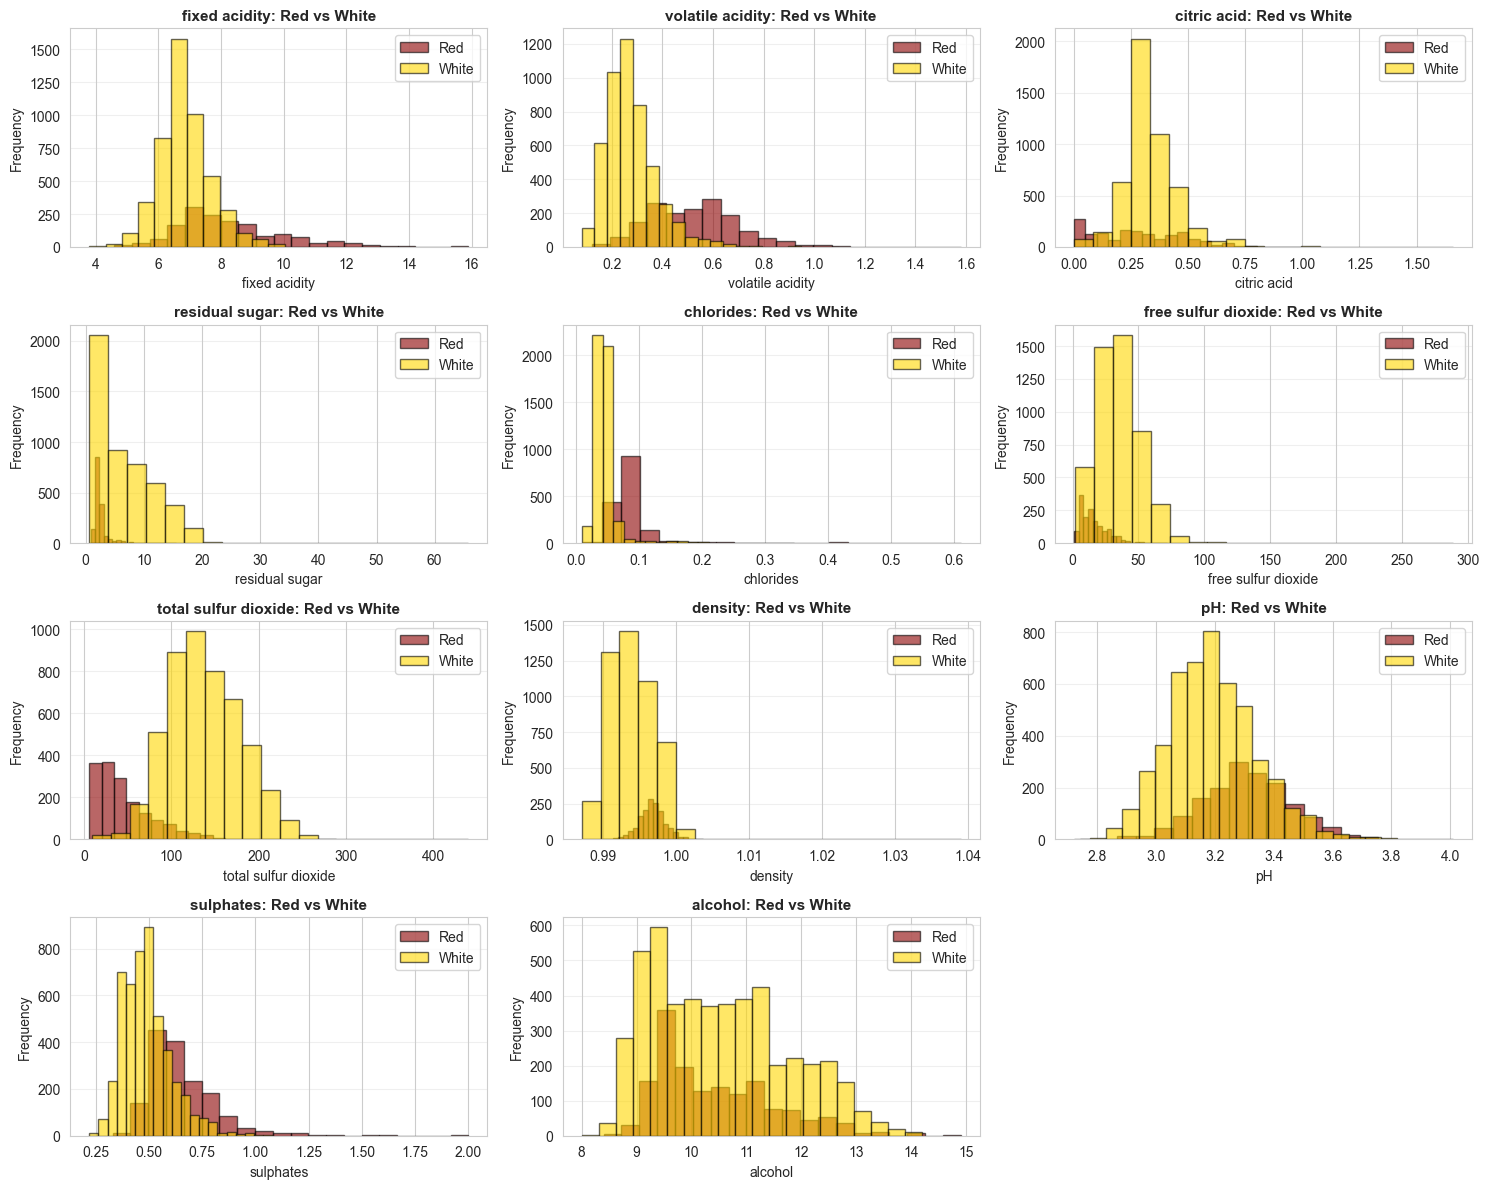

In [14]:
# Visualize comparison
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(feature_cols):
    axes[idx].hist(red_wines[col], bins=20, alpha=0.6, label='Red', color='darkred', edgecolor='black')
    axes[idx].hist(white_wines[col], bins=20, alpha=0.6, label='White', color='gold', edgecolor='black')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(f'{col}: Red vs White', fontsize=11, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)

axes[-1].axis('off')

plt.tight_layout()
plt.show()

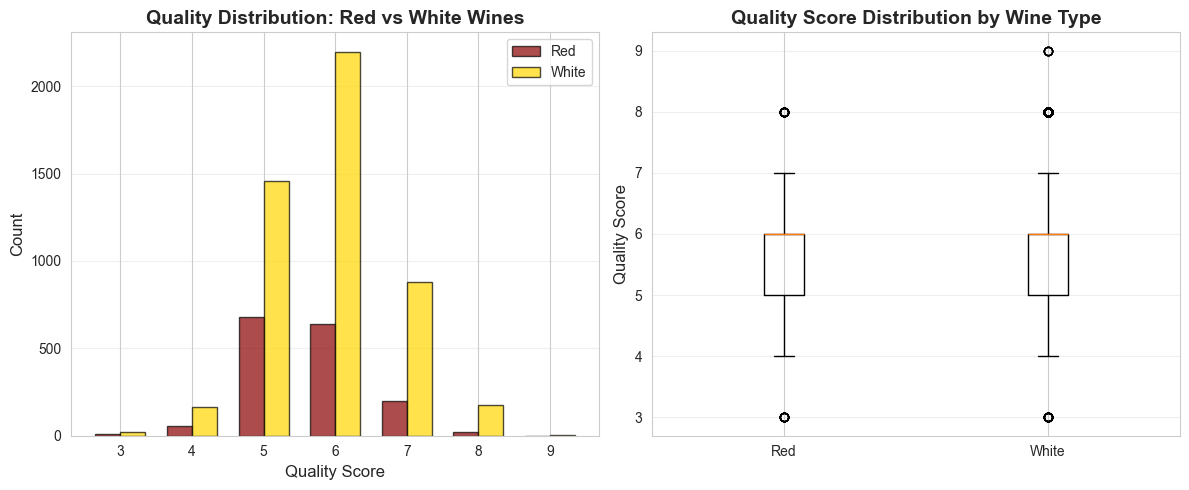


Red Wine - Mean Quality: 5.64, Std: 0.81
White Wine - Mean Quality: 5.88, Std: 0.89


In [18]:
# Quality distribution by wine type

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Get all unique quality scores from both wine types to ensure consistent x-axis
all_quality_scores = sorted(df['quality'].unique())
red_quality = red_wines['quality'].value_counts().reindex(all_quality_scores, fill_value=0)
white_quality = white_wines['quality'].value_counts().reindex(all_quality_scores, fill_value=0)

x = np.arange(len(all_quality_scores))
width = 0.35

plt.bar(x - width/2, red_quality.values, width, label='Red', color='darkred', alpha=0.7, edgecolor='black')
plt.bar(x + width/2, white_quality.values, width, label='White', color='gold', alpha=0.7, edgecolor='black')
plt.xlabel('Quality Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Quality Distribution: Red vs White Wines', fontsize=14, fontweight='bold')
plt.xticks(x, all_quality_scores)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot([red_wines['quality'], white_wines['quality']], labels=['Red', 'White'])
plt.ylabel('Quality Score', fontsize=12)
plt.title('Quality Score Distribution by Wine Type', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nRed Wine - Mean Quality: {red_wines['quality'].mean():.2f}, Std: {red_wines['quality'].std():.2f}")
print(f"White Wine - Mean Quality: {white_wines['quality'].mean():.2f}, Std: {white_wines['quality'].std():.2f}")


## 7. Key Insights Summary

In [21]:
print("=" * 80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total samples: {len(df)}")
print(f"   - Red wines: {len(red_wines)} ({len(red_wines)/len(df)*100:.1f}%)")
print(f"   - White wines: {len(white_wines)} ({len(white_wines)/len(df)*100:.1f}%)")
print(f"   - No missing values: ✓")

print("\n2. QUALITY DISTRIBUTION:")
print(f"   - Quality range: {df['quality'].min()} to {df['quality'].max()}")
print(f"   - Most common quality: {quality_counts.idxmax()} ({quality_counts.max()} samples)")
print(f"   - Mean quality: {df['quality'].mean():.2f}")
print(f"   - Class imbalance: Quality scores 5-6 dominate the dataset")

print("\n3. FEATURE CORRELATIONS WITH QUALITY:")
top_positive = quality_correlations.drop('quality').head(3)
top_negative = quality_correlations.drop('quality').tail(3)
print("   Top positive correlations:")
for feat, corr in top_positive.items():
    print(f"     - {feat}: {corr:.3f}")
print("   Top negative correlations:")
for feat, corr in top_negative.items():
    print(f"     - {feat}: {corr:.3f}")

print("\n4. RED VS WHITE WINE DIFFERENCES:")
top_diffs = comparison_df.head(3)
print("   Features with largest differences:")
for feat in top_diffs.index:
    print(f"     - {feat}: Red={comparison_df.loc[feat, 'Red Wine (Mean)']:.2f}, White={comparison_df.loc[feat, 'White Wine (Mean)']:.2f}")

print("\n5. RECOMMENDATIONS FOR MODELING:")
print("   - Feature scaling is essential due to different ranges")
print("   - Consider stratified sampling due to class imbalance")
print("   - Focus on features with strong correlations to quality")

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW:
   - Total samples: 6497
   - Red wines: 1599 (24.6%)
   - White wines: 4898 (75.4%)
   - No missing values: ✓

2. QUALITY DISTRIBUTION:
   - Quality range: 3 to 9
   - Most common quality: 6 (2836 samples)
   - Mean quality: 5.82
   - Class imbalance: Quality scores 5-6 dominate the dataset

3. FEATURE CORRELATIONS WITH QUALITY:
   Top positive correlations:
     - alcohol: 0.444
     - wine_type: 0.119
     - citric acid: 0.086
   Top negative correlations:
     - chlorides: -0.201
     - volatile acidity: -0.266
     - density: -0.306

4. RED VS WHITE WINE DIFFERENCES:
   Features with largest differences:
     - total sulfur dioxide: Red=46.47, White=138.36
     - free sulfur dioxide: Red=15.87, White=35.31
     - residual sugar: Red=2.54, White=6.39

5. RECOMMENDATIONS FOR MODELING:
   - Feature scaling is essential due to different ranges
   - Consider stratified sampling due to class imbalance
   - Focus on featur